In [1]:
import pandas as pd

In [2]:
# Unggah file ke Google Colab dari lokal (gunakan hanya jika belum mengunggah melalui UI Colab)
from google.colab import files
uploaded = files.upload()

Saving sentimen.xlsx to sentimen.xlsx


In [3]:
# Load the sentiment analysis dataset
sentiment_file_path = "sentimen.xlsx"
sentiment_xls = pd.ExcelFile(sentiment_file_path)

# Display sheet names to understand the structure of the file
sentiment_xls.sheet_names


['Sheet1']

In [4]:
# Load the sentiment data from the first sheet
df_sentiment = pd.read_excel(sentiment_xls, sheet_name='Sheet1')

# Display the first few rows to understand its structure
df_sentiment.head()


,Komentar
0,Ruang kelas perlu update ke smartclass
1,Kursi di perbaiki/ganti biar tidak goyang2. Me...
2,Lebih kpd penggantian kursi meja
3,Meja dan kursi agar diganti menjadi ergonomis
4,"Kursinya yg empuk dong, kan sesuai UKT 25jeti"


In [5]:
# Rename the column for easier reference
df_sentiment.columns = ["Komentar"]

# Display the first few rows again
df_sentiment.head()


,Komentar
0,Ruang kelas perlu update ke smartclass
1,Kursi di perbaiki/ganti biar tidak goyang2. Me...
2,Lebih kpd penggantian kursi meja
3,Meja dan kursi agar diganti menjadi ergonomis
4,"Kursinya yg empuk dong, kan sesuai UKT 25jeti"


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


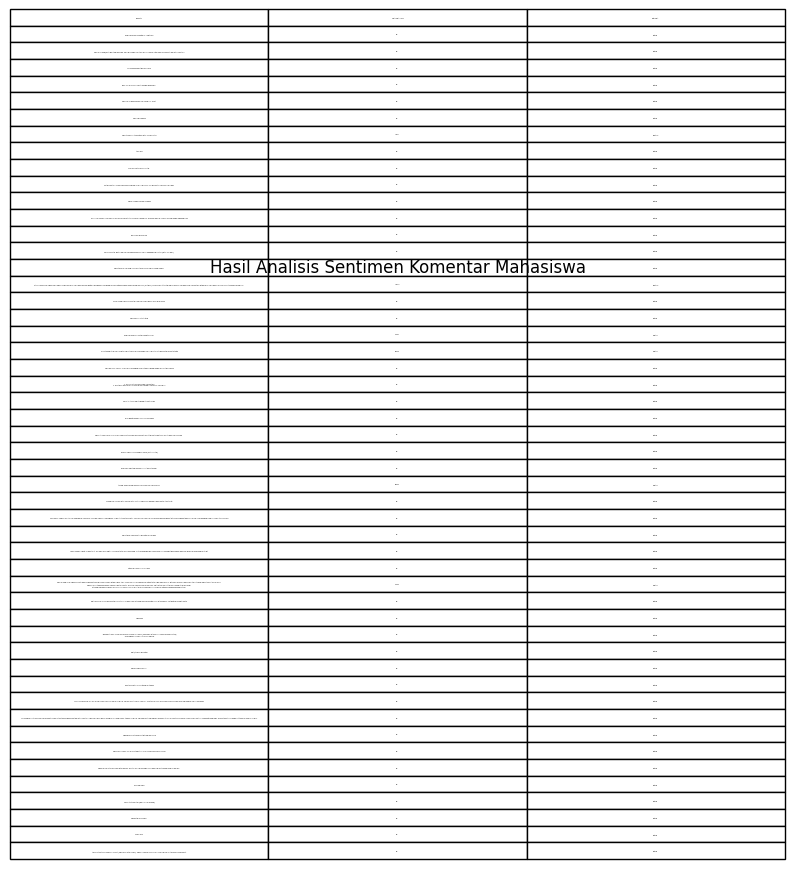

In [6]:
# Import necessary NLP libraries
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download necessary resources
nltk.download('vader_lexicon')

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis on comments
df_sentiment["Sentiment Score"] = df_sentiment["Komentar"].apply(lambda x: sia.polarity_scores(str(x))['compound'])

# Categorizing sentiment as Positive, Neutral, or Negative
df_sentiment["Sentiment"] = df_sentiment["Sentiment Score"].apply(lambda x: "Positive" if x > 0.05 else ("Negative" if x < -0.05 else "Neutral"))

# Alternatif menampilkan hasil Sentiment Analysis dalam bentuk tabel visual
plt.figure(figsize=(10, 4))
plt.table(cellText=df_sentiment.values,
          colLabels=df_sentiment.columns,
          cellLoc='center',
          loc='center')

plt.axis('off')
plt.title("Hasil Analisis Sentimen Komentar Mahasiswa")
plt.show()



In [7]:
import pandas as pd
from textblob import TextBlob
from IPython.display import display

# Memuat kembali dataset
sentiment_file_path = "sentimen.xlsx"
df_sentiment = pd.read_excel(sentiment_file_path)

# Menyesuaikan nama kolom untuk analisis
df_sentiment.columns = ["Komentar"]

# Melakukan Sentiment Analysis menggunakan TextBlob
df_sentiment["Sentiment Score"] = df_sentiment["Komentar"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Mengkategorikan sentimen sebagai Positif, Netral, atau Negatif
df_sentiment["Sentiment"] = df_sentiment["Sentiment Score"].apply(
    lambda x: "Positive" if x > 0.05 else ("Negative" if x < -0.05 else "Neutral")
)

# Menampilkan tabel dalam format yang bisa di-copy
display(df_sentiment)


,Komentar,Sentiment Score,Sentiment
0,Ruang kelas perlu update ke smartclass,0.000000,Neutral
1,Kursi di perbaiki/ganti biar tidak goyang2. Me...,0.000000,Neutral
2,Lebih kpd penggantian kursi meja,0.000000,Neutral
3,Meja dan kursi agar diganti menjadi ergonomis,0.000000,Neutral
4,"Kursinya yg empuk dong, kan sesuai UKT 25jeti",0.000000,Neutral
5,Kursi yang Empuk,0.000000,Neutral
6,Perlu tambahan stop kontak untuk charge laptop,0.000000,Neutral
7,tidak ada,0.000000,Neutral
8,layar proyektor kurang center,-0.100000,Negative
9,Untuk Papa tulis cukup bagus hanya sepidol yan...,0.000000,Neutral


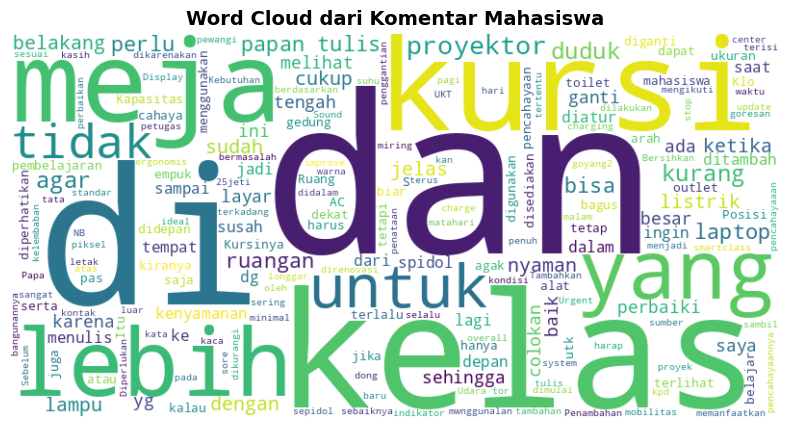

In [8]:
from wordcloud import WordCloud

# Menggabungkan semua komentar menjadi satu teks
text_data = " ".join(df_sentiment["Komentar"].dropna().astype(str))

# Membuat word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(text_data)

# Menampilkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud dari Komentar Mahasiswa", fontsize=14, fontweight="bold")
plt.show()


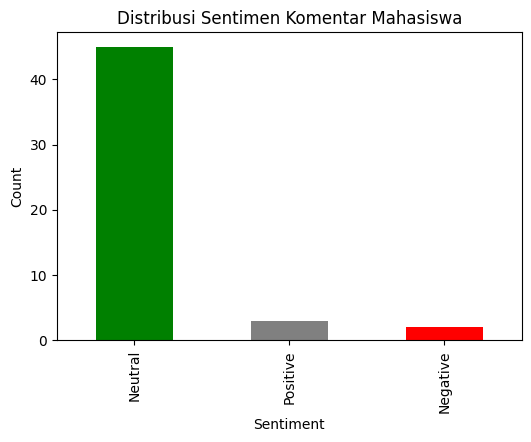

In [9]:
# Statistik distribusi sentimen
sentiment_counts = df_sentiment["Sentiment"].value_counts()
plt.figure(figsize=(6,4))
sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Distribusi Sentimen Komentar Mahasiswa")
plt.show()